In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import extra_keras_datasets.emnist as emnist
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout
#!pip install extra_keras_datasets

INFO:root:Loading dataset = emnist


numpy               : 1.19.2
matplotlib          : 3.3.2
tensorflow          : 2.4.1
tensorflow.keras    : 2.4.0
743907328/743900280 [==============================] - 466s 1us/step


t_images    : uint8, (124800, 28, 28)
t_labels    : uint8, (124800,)
v_images    : uint8, (20800, 28, 28)
v_labels    : uint8, (20800,)


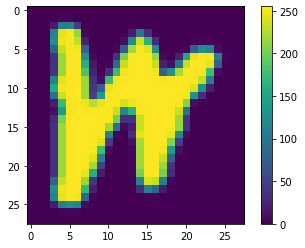

In [2]:
def show_version(pkg):
    print("{0:20}: {1}".format(pkg.__name__, pkg.__version__))
show_version(np)
show_version(matplotlib)
show_version(tf)
show_version(keras)

#Step:1-3
# EMNIST-Letters  : https://www.nist.gov/itl/products-and-services/emnist-dataset
(t_images, t_labels), (v_images, v_labels) = emnist.load_data(type="letters")

def show_data_info(label, data):
    print("{:12}: {}, {}".format(label, data.dtype, data.shape))
    
def compatible_image(img):
    if img.ndim == 3 and img.shape[2] == 1:
        img = img.reshape(img.shape[0], img.shape[1])
    return img

def show_image(img):
    plt.rcParams["font.size"] = 10
    plt.figure()
    plt.imshow(compatible_image(img))
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
# Step: 1-4
# 28*28 픽셀 이미지 데이터 훈련 데이터 124800, 평가데이터 20800
# 27의 분류, 0~26 정답레이블 1=A, 2=B,,,, 26=Z
show_data_info("t_images", t_images) # 3차원 데이터
show_data_info("t_labels", t_labels)
show_data_info("v_images", v_images)
show_data_info("v_labels", v_labels)
show_image(t_images[0])

t_images    : float32, (124800, 28, 28, 1)
v_images    : float32, (20800, 28, 28, 1)


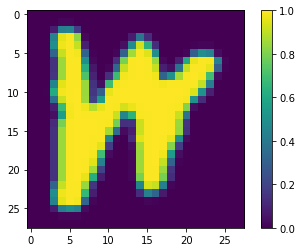

In [3]:
# step 1-5
# 1. 이미지가 3차원(124800, 28, 28), CNN에서는 4차원으로 변환 필요
# -> (124800, 28, 28, 1) -> 회색으로 사용하겠다

def adjust_image(img):
    img = img.astype('float32')
    img = img/255.0
    img = img.reshape(-1, 28, 28, 1) #3D -> 4D
    return img

t_images = adjust_image(t_images)
v_images = adjust_image(v_images)

show_data_info("t_images", t_images) 
show_data_info("v_images", v_images)
show_image(t_images[0])

    

In [7]:
# step 1-6 모델 정의
# 순차 모델 Conv2D 3개 -> MaxPooling2D() -> Dropout ->> Flatten ->

# 모델 생성
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add((layers.Dropout(0.4)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add((layers.Dropout(0.4)))

# 1차원으로 생성
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add((layers.Dropout(0.4)))
model.add(layers.Dense(27, activation='softmax'))

# step 1-7
opt = keras.optimizers.Adam()
loss = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

# 모델정보 확인
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 64)         

In [9]:
# step 1-8
history = model.fit(
    t_images,
    t_labels,
    epochs=20,
    batch_size=128,
    validation_data=(v_images,v_labels), #검증용 데이터 전달
    verbose=2
)

Epoch 1/20
975/975 - 180s - loss: 1.0546 - accuracy: 0.6752 - val_loss: 0.3168 - val_accuracy: 0.8953
Epoch 2/20
975/975 - 185s - loss: 0.4412 - accuracy: 0.8602 - val_loss: 0.2452 - val_accuracy: 0.9184
Epoch 3/20
975/975 - 188s - loss: 0.3549 - accuracy: 0.8886 - val_loss: 0.2141 - val_accuracy: 0.9283
Epoch 4/20
975/975 - 190s - loss: 0.3109 - accuracy: 0.9005 - val_loss: 0.2027 - val_accuracy: 0.9323
Epoch 5/20
975/975 - 189s - loss: 0.2847 - accuracy: 0.9085 - val_loss: 0.1934 - val_accuracy: 0.9369
Epoch 6/20
975/975 - 190s - loss: 0.2671 - accuracy: 0.9150 - val_loss: 0.1931 - val_accuracy: 0.9357
Epoch 7/20
975/975 - 191s - loss: 0.2541 - accuracy: 0.9182 - val_loss: 0.1843 - val_accuracy: 0.9375
Epoch 8/20
975/975 - 187s - loss: 0.2445 - accuracy: 0.9207 - val_loss: 0.1777 - val_accuracy: 0.9411
Epoch 9/20
975/975 - 186s - loss: 0.2358 - accuracy: 0.9237 - val_loss: 0.1813 - val_accuracy: 0.9407
Epoch 10/20
975/975 - 187s - loss: 0.2293 - accuracy: 0.9262 - val_loss: 0.1759 - 

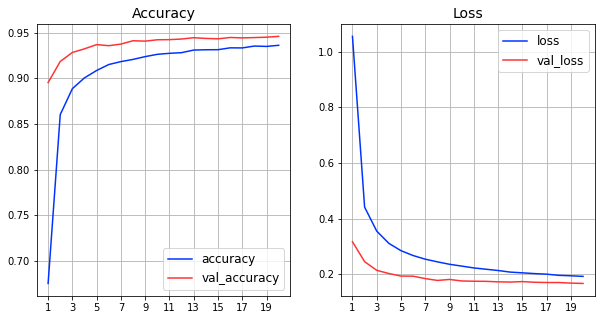

In [10]:
# step 1-9
# 파란색이 훈련데이터, 빨간색이 검증 데이터

def show_history(history):
    plt.rcParams['font.size']=10
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    t_col = '#03F'
    v_col = '#F33'
    
    ax[0].set_title("Accuracy", fontsize=14)
    ax[0].plot(history.history["accuracy"], color=t_col, label="accuracy")
    ax[0].plot(history.history["val_accuracy"], color=v_col, label="val_accuracy")
    ax[1].set_title("Loss", fontsize=14)
    ax[1].plot(history.history["loss"], color=t_col, label="loss")
    ax[1].plot(history.history["val_loss"], color=v_col, label="val_loss")
    x_pos = np.arange(0, len(history.epoch), 2)
    for x in ax:
        x.set_xticks(x_pos)
        x.set_xticklabels(x_pos + 1)
        x.grid(True)
        x.legend(fontsize=12)
    plt.show()
    
show_history(history)

In [11]:
# step 1-10

model.save('my-model.h5')
